In [1]:
import numpy as np
from sklearn.cluster import KMeans
import os

In [2]:
def scan_files(directory, prefix=None, postfix=None):
    files_list = []
    for root, sub_dirs, files in os.walk(directory):
        for special_file in files:
            if postfix:
                if special_file.endswith(postfix):
                    files_list.append(os.path.join(root, special_file))
            elif prefix:
                if special_file.startswith(prefix):
                    files_list.append(os.path.join(root, special_file))
            else:
                files_list.append(os.path.join(root, special_file))
    return files_list


def collect_sizes(txt_fname, size):
    sizes = []
    with open(txt_fname, 'r') as f:
        for line in f.readlines():
            tokens = line.strip().split()
            sizes.append([int(float(tokens[3])*size), int(float(tokens[4])*size)])
    return sizes

def main(data_path, size=608):
    txt_fnames = scan_files(data_path, postfix=".txt")
    sizes = []
    for txt_fname in txt_fnames:
        sizes += collect_sizes(txt_fname, size)
    return sizes

In [3]:
data_path = "/home/ssd0/Develop/liyu/batch6_hls09_1216/train"
sizes = main(data_path)

In [4]:
import pickle

# save file
with open("1216_sizes.pkl", 'wb') as f:
    pickle.dump(sizes, f)
    
# # open saved file
# with open("1216_sizes.pkl", 'rb') as f:
#     sizes = pickle.load(f)

### plot scattered points

In [5]:
import matplotlib.pyplot as plt

In [ ]:
x = [size[0] for size in sizes]
y = [size[1] for size in sizes]

#### sizes, kmeans 15

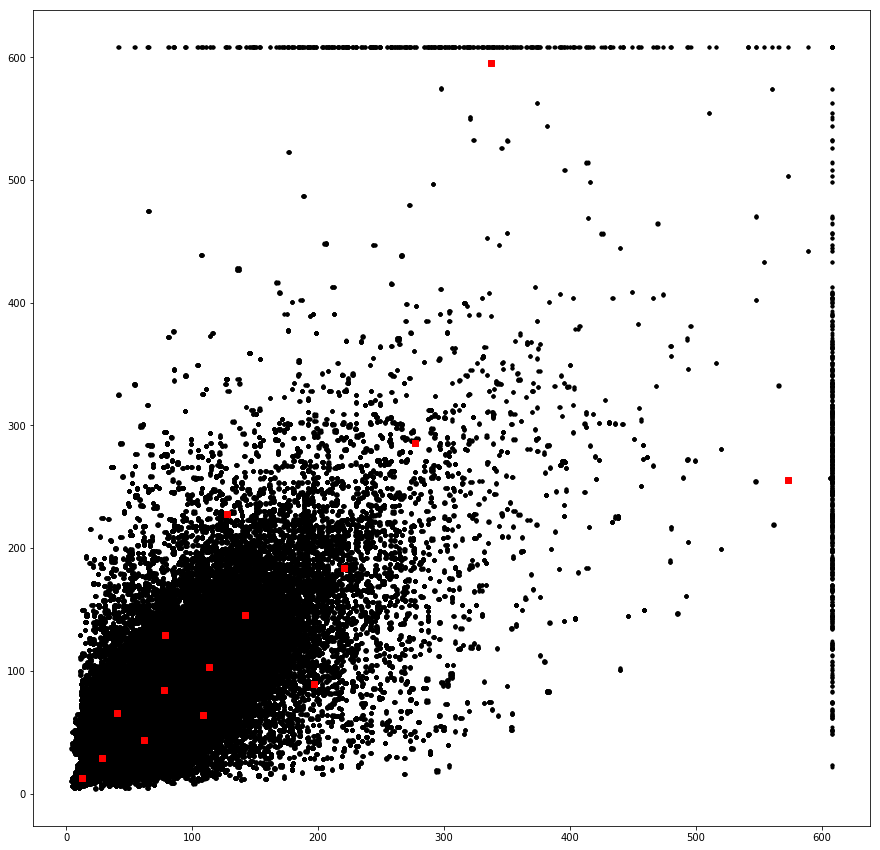

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  28,29,  40,65,  62,43,  77,84,  108,63,  78,129,  113,103,  197,89,  142,145,  127,227,  220,183,  277,285,  573,255,  337,595
"""

plt.show()

#### sizes_new, kmeans 15

In [18]:
# get the number of boxes that is bigger > 600
w_large = [size for size in sizes if size[0] > 600]
h_large = [size for size in sizes if size[1] > 600]
print("  ", "total", len(sizes), "w_large", len(w_large), "h_large", len(h_large))

   total 1788359 w_large 1035 h_large 829


In [19]:
# remove abnormal boxes
sizes_new = [size for size in sizes if size[0] < 600 and size[1] < 600]
print("  ", "sizes_new total", len(sizes_new))


   sizes_new total 1786629


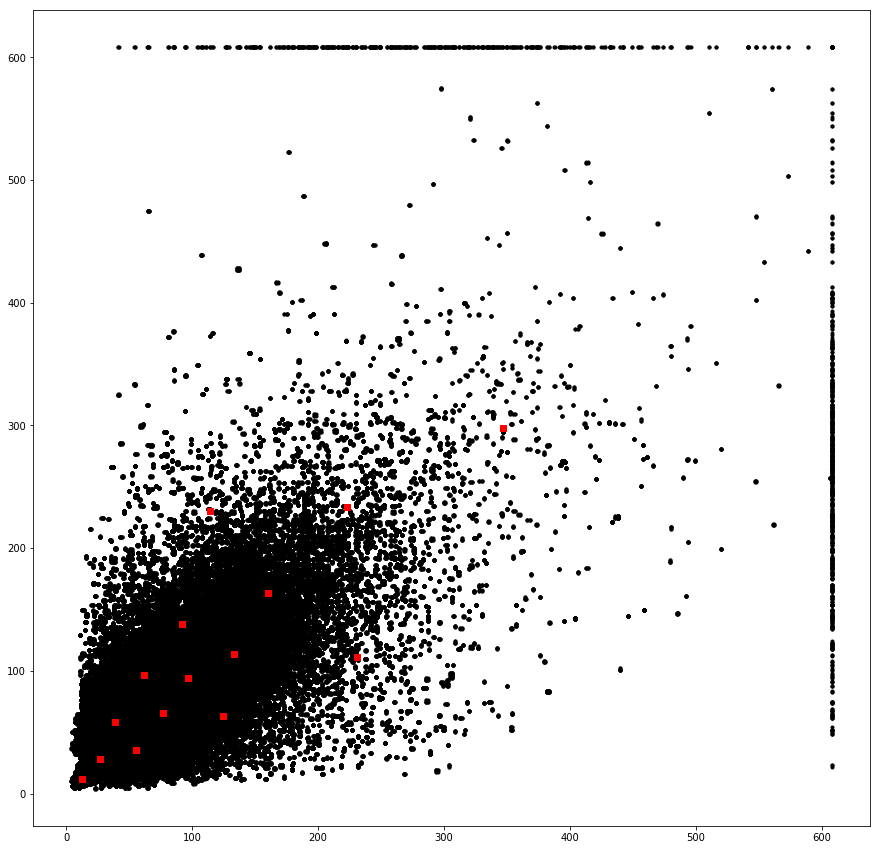

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  27,28,  55,35,  38,58,  76,65,  62,96,  124,63,  97,94,  91,137,  133,113,  231,111,  160,163,  114,230,  222,233,  346,298
"""

plt.show()

#### sizes, cv2.kmeans2 15

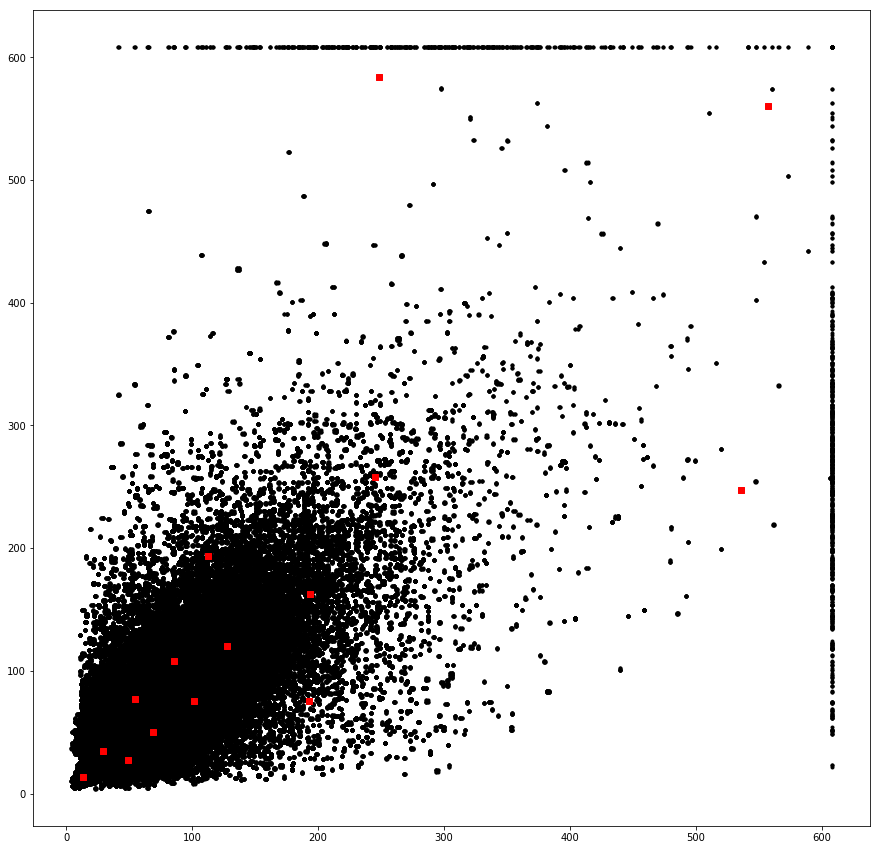

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
13,13,  29,34,  49,27,  69,50,  54,77,  101,75,  85,108,  192,75,  127,119,  112,193,  193,162,  244,258,  535,247,  248,583,  556,560
"""

plt.show()

#### sizes_new, cv2.kmeans2 15

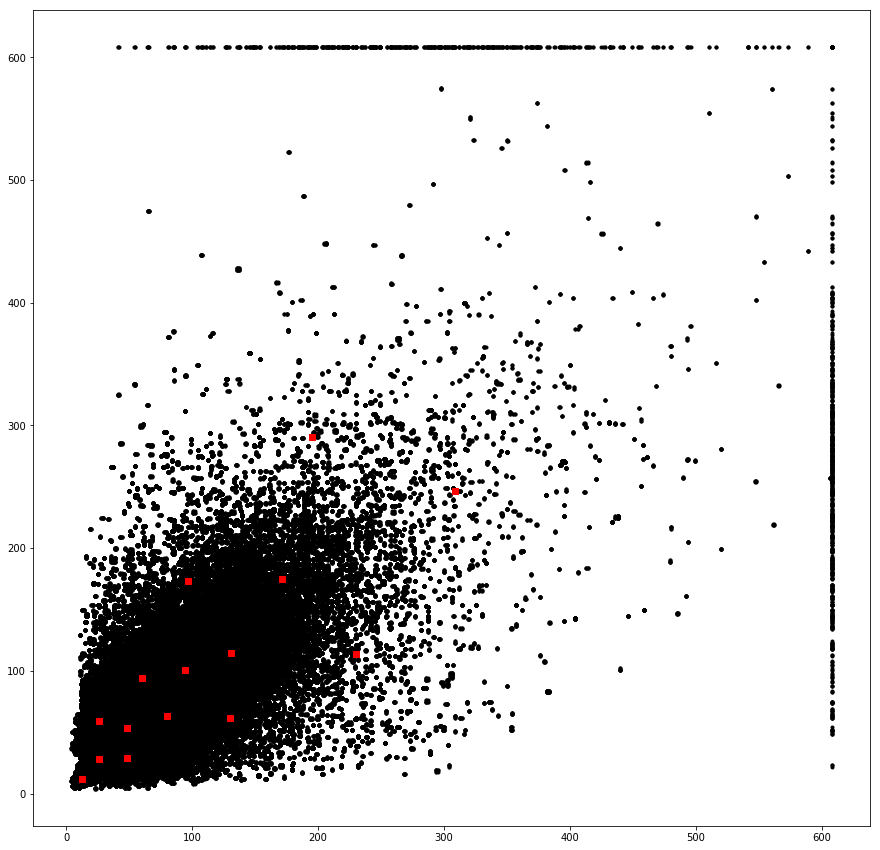

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  26,27,  48,29,  26,59,  48,53,  80,63,  59,94,  129,61,  94,100,  130,114,  96,173,  229,113,  171,175,  194,291,  308,246
"""

plt.show()

### kmeans

In [20]:
X = np.array(sizes_new)
kmeans = KMeans(n_clusters=15, random_state=1).fit(X)

In [21]:
centers = []
for center in kmeans.cluster_centers_:
    print("du", center)
    centers.append(center)
print(centers)

du [97.08646819 94.54485064]
du [12.25605312 12.20954479]
du [133.61857552 113.59812097]
du [160.00816327 163.29106909]
du [55.19077307 35.45533042]
du [231.26690661 111.09651449]
du [62.05301268 96.61956206]
du [346.55965046 298.18199088]
du [38.45324296 58.73718443]
du [124.37810529  63.02596791]
du [76.58092056 65.74776399]
du [114.02353495 230.52883031]
du [27.04103332 28.0356229 ]
du [222.81779135 233.37634819]
du [ 91.93516124 137.90618255]
[array([97.08646819, 94.54485064]), array([12.25605312, 12.20954479]), array([133.61857552, 113.59812097]), array([160.00816327, 163.29106909]), array([55.19077307, 35.45533042]), array([231.26690661, 111.09651449]), array([62.05301268, 96.61956206]), array([346.55965046, 298.18199088]), array([38.45324296, 58.73718443]), array([124.37810529,  63.02596791]), array([76.58092056, 65.74776399]), array([114.02353495, 230.52883031]), array([27.04103332, 28.0356229 ]), array([222.81779135, 233.37634819]), array([ 91.93516124, 137.90618255])]


In [22]:
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)

{52000: array([222.81779135, 233.37634819]), 5035: array([76.58092056, 65.74776399]), 1956: array([55.19077307, 35.45533042]), 12678: array([ 91.93516124, 137.90618255]), 103337: array([346.55965046, 298.18199088]), 15178: array([133.61857552, 113.59812097]), 5995: array([62.05301268, 96.61956206]), 26285: array([114.02353495, 230.52883031]), 26127: array([160.00816327, 163.29106909]), 2258: array([38.45324296, 58.73718443]), 149: array([12.25605312, 12.20954479]), 758: array([27.04103332, 28.0356229 ]), 9179: array([97.08646819, 94.54485064]), 25692: array([231.26690661, 111.09651449]), 7839: array([124.37810529,  63.02596791])}


In [23]:
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))

[(149, array([12.25605312, 12.20954479])), (758, array([27.04103332, 28.0356229 ])), (1956, array([55.19077307, 35.45533042])), (2258, array([38.45324296, 58.73718443])), (5035, array([76.58092056, 65.74776399])), (5995, array([62.05301268, 96.61956206])), (7839, array([124.37810529,  63.02596791])), (9179, array([97.08646819, 94.54485064])), (12678, array([ 91.93516124, 137.90618255])), (15178, array([133.61857552, 113.59812097])), (25692, array([231.26690661, 111.09651449])), (26127, array([160.00816327, 163.29106909])), (26285, array([114.02353495, 230.52883031])), (52000, array([222.81779135, 233.37634819])), (103337, array([346.55965046, 298.18199088]))]
  12,12,  27,28,  55,35,  38,58,  76,65,  62,96,  124,63,  97,94,  91,137,  133,113,  231,111,  160,163,  114,230,  222,233,  346,298


### cv2.kmeans2

In [25]:
import cv2

In [36]:
X = np.array(sizes_new, dtype=np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, label, centers = cv2.kmeans(X, 15, None, criteria, 10, flags)

In [37]:
print(centers)
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))

[[ 94.51189  100.72984 ]
 [129.941     61.42511 ]
 [171.39436  175.08206 ]
 [ 59.982624  94.13999 ]
 [ 48.331886  53.26239 ]
 [ 12.328815  12.268735]
 [194.83719  291.00717 ]
 [ 48.355762  29.408213]
 [130.76721  114.405716]
 [308.3457   246.61961 ]
 [229.98338  113.72115 ]
 [ 26.388565  59.15131 ]
 [ 96.98354  173.51686 ]
 [ 80.206764  63.51423 ]
 [ 26.150314  27.907501]]
{14960: array([130.76721 , 114.405716], dtype=float32), 5094: array([80.206764, 63.51423 ], dtype=float32), 26153: array([229.98338, 113.72115], dtype=float32), 76044: array([308.3457 , 246.61961], dtype=float32), 7981: array([129.941  ,  61.42511], dtype=float32), 5646: array([59.982624, 94.13999 ], dtype=float32), 9520: array([ 94.51189, 100.72984], dtype=float32), 1560: array([26.388565, 59.15131 ], dtype=float32), 1422: array([48.355762, 29.408213], dtype=float32), 151: array([12.328815, 12.268735], dtype=float32), 30008: array([171.39436, 175.08206], dtype=float32), 729: array([26.150314, 27.907501], dtype=float